## 使用梯度上升法实现PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

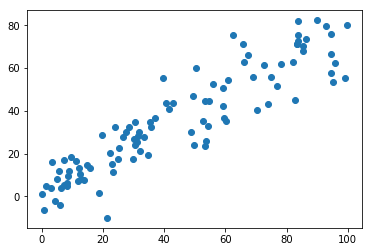

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

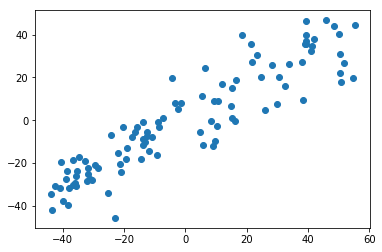

In [6]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [7]:
np.mean(X_demean[:,0])

1.3500311979441904e-15

In [8]:
np.mean(X_demean[:,1])

-7.6738615462090825e-15

### 梯度上升法

In [9]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [10]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始
initial_w

array([ 0.37061708,  0.28515471])

In [11]:
eta = 0.001
# 注意3： 不能使用StandardScaler标准化数据

In [12]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([ 0.78121351,  0.62426392])

In [13]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([ 0.78121351,  0.62426392])

In [14]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

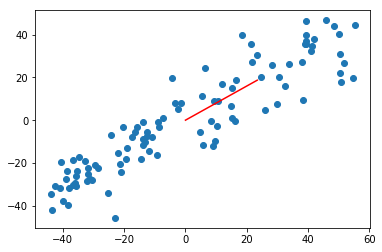

In [15]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

### 使用极端数据集测试

In [16]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

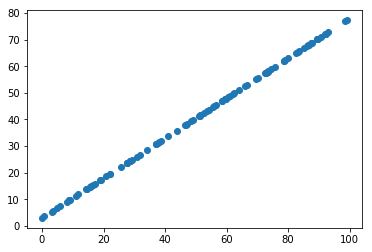

In [17]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [18]:
X2_demean = demean(X2)

In [19]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

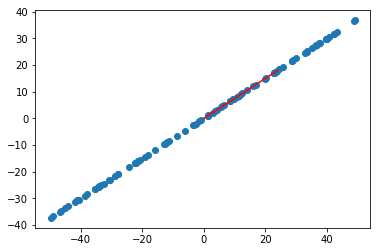

In [20]:
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()

同学们可以自己思考实现随机梯度下降法和小批量梯度下降法的版本：）